### Тематическое моделирование

In [47]:
import re
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import nltk
import pymorphy2
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from gensim.models import *
from gensim import corpora

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

nltk.download('stopwords')
morph = pymorphy2.MorphAnalyzer()
stopwords_list = stopwords.words('russian')
%matplotlib inline

C:\Users\Alexidis\AppData\Local\Temp\ipykernel_21076\4244979677.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexidis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
e:\progi\python38\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
e:\progi\python38\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
e:\progi\python38\lib\site-packages\pymorphy2\units\base.py

In [48]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
C:\Users\Alexidis\AppData\Local\Temp\ipykernel_21076\539373109.py:1: DeprecationWarning: invalid escape sequence \w
  words_regex = re.compile('\w+')


In [49]:
HOME_DIR = Path('..')
INPUT_DIR = HOME_DIR / 'input/l3/'

data = pd.read_csv(INPUT_DIR / 'lenta-ru-news.csv')
data['title'] = data['title'].str.replace('\xa0', ' ')
data.sample(3)

C:\Users\Alexidis\AppData\Local\Temp\ipykernel_21076\3422094607.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(INPUT_DIR / 'lenta-ru-news.csv')


,url,title,text,topic,tags,date
593838,https://lenta.ru/news/2016/04/27/wimbledon/,Призовой фонд Уимблдона превысил 40 миллионов долларов,"Призовой фонд Уимблдона-2016 увеличен на 5% по сравнению с 2015 годом и составит 28,1 миллиона фунтов стерлингов (около 41 миллиона долларов). Об этом сообщается на официальном сайте турнира. Победители одиночных соревнований среди мужчин и женщин получат по 2 миллиона фунтов (2,9 миллиона долларов), что на 6,4% больше, чем в 2015 году, когда чемпионы серб Новак Джокович и американка Серена Уильямс заработали по 1,88 миллиона фунтов (2,74 миллиона долларов). Общий призовой фонд турнира в том году был равен 26,75 миллиона фунтов (39 миллионов долларов). Доходы финалистов вырастут на 6,4%, их призовые составят по одному миллиону фунтов (1,46 миллиона долларов). Проигравшие в первом круге Уимблдона получат по 30 тысяч фунтов (43,7 тысячи долларов). Победители в парном разряде получат на 2,9% больше призовых, чем в прошлом году, — 350 тысяч фунтов (510 тысяч долларов). Призовые в смешанном парном разряде остались неизменными — 100 тысяч фунтов (146 тысяч долларов) для пары-победителя. Уимблдон — третий в сезоне турнир серии Большого шлема. Он состоится с 27 июня по 10 июля в Великобритании.",Спорт,NaN,2016/04/27
147101,https://lenta.ru/news/2006/03/14/tszyu/,Костя Цзю успешно прошел очередной тур танцевального шоу,"Российский боксер Константин Цзю, в недалеком прошлом чемпион мира в категории до 63,5 кг, в очередной раз успешно выступил на телевизионном шоу ""Танец со звездой"", проводимом австралийским каналом Channel 7. В четвертом туре россиянин вместе с партнершей Людмилой Кройтор получили от судей 26 из 40 возможных баллов и вышли в пятый раунд, сообщает официальный сайт боксера. На этот раз Цзю и Кройтор вышли на сцену первыми и исполнили Paso Doble - танец быка и матадора, причем боксеру досталась роль последнего. В каждом из туров из конкурса вылетает по одной паре танцоров. На этот раз не повезло австралийской теннисистке Алисии Молик и ее партнеру Джону Полу Коллинзу. Отметим, что победитель конкурса определяется не только по оценкам жюри, но и по итогам sms-голосования телезрителей. Все средства, полученные Цзю за участие в шоу, поступят в специальный фонд помощи нуждающимся детям и семьям.",Спорт,Все,2006/03/14
87633,https://lenta.ru/news/2004/02/14/zidan/,"Спортивный директор ""Реала"" оштрафован, а Зинедин Зидан дисквалифицирован","Плеймекер мадридского ""Реала"" и сборной Франции Зинедин Зидан дисквалифицирован на один матч дисциплинарным комитетом испанской федерации футбола за удар соперника во время полуфинального матча на Кубок Испании с ""Севильей"". Спортивный директор ""Реала"" Хорхе Вальдано, который бурно протестовал против решения арбитра, оштрафован на 2 тысячи евро. ""Реал"" подал апелляцию на решение КДК в федерацию и комитет по спортивной дисциплине, но получил отказ, сообщает France Press. Руководство мадридского клуба уверено, что Зидан даже не притронулся к защитнику ""Севильи"" Пало Альфаро, а тот просто сымитировал удар и упал. Таким образом, ключевой игрок команды пропустит ближайший поединок с ""Валенсией"", который фактически станет матчем за первое место. Вальдано же оштрафован за то, что в перерыве матча ""Севилья"" - ""Реал"" пытался оказать воздействие на арбитра Эдуардо Иттуральде Гонсалеса, который удалил Зидана, сообщает Reuters. ""Мы убеждены, что спортивный директор любой команды должен вести себя подобающим образом во время игры. Поведение Вальдано не соответствует спортивным принципам, - сообщил Альфредо Флорес, руководитель комитета по проведению соревнований в испанской федерации футбола. - Хотя он не пытался оказать физического воздействия на арбитра, но заслуживает штрафа"".",Спорт,Все,2004/02/14


In [50]:
data.topic.value_counts().head(15)

Россия               160445
Мир                  136621
Экономика            79528 
Спорт                64413 
Культура             53797 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44663 
Из жизни             27605 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

Для ускорения вычислений оставим тексты из 5 тем:

In [51]:
topics = ['Интернет и СМИ', 'Дом', 'Ценности', 'Мир', 'Экономика', 'Спорт', 'Культура', 'Путешествия', 'Наука и техника', 'Силовые структуры']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)

In [52]:
data.text.iloc[1]

'подземный толчок силой 5,2 балла На северо-западе Турции, где 17 августа произошло разрушительноеземлетрясение, приведшее к гибели более 14 тысяч человек, сегодняв 11.11 местного времени (12.11 по московскому времени) зафиксирован подземный толчок силой 5,2 балла по шкале Рихтера. Его эпицентр, какпрежде, находился в городе Измит, сообщила сейсмологическая обсерватория Босфорского университета. Новое землетрясение вызвало панику у местных жителей. По сообщению ВВС, погиб один человек и около 70 ранены.'

In [53]:
# Оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:
data = data.sample(10000)
data.topic.value_counts()

Мир                  2895
Экономика            1569
Спорт                1321
Культура             1189
Наука и техника      1071
Интернет и СМИ       918 
Дом                  494 
Силовые структуры    253 
Ценности             152 
Путешествия          138 
Name: topic, dtype: int64

In [54]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [55]:
data['text'] = preprocessed_text
data.sample(3)

,url,title,text,topic,tags,date
292599,https://lenta.ru/news/2009/07/27/soros/,Латвия подала заявку на антикризисный кредит Сороса,"[латвия, претендовать, финансовый, поддержка, фонд, чрезвычайный, помощь, джордж, сорос, сообщать, delfi, ссылка, пресс, служба, латвийский, отделение, фонд, американский, финансист, единовременно, выделить, миллион, доллар, оказание, помощь, страна, пострадать, кризис, деньга, предоставляться, срок, год, уточнять, латвийский, издание, телеграф, претендовать, кредит, страна, должный, подать, заявка, фонд, сорос, окончательно, решение, государство, следовать, выдать, деньга, должный, принять, консультативный, совет, институт, открытый, общество, согласно, правило, фонд, кредит, предоставляться, государство, который, наиболее, сильно, пострадать, кризис, деньга, сорос, подать, заявка, страна, включая, албания, армения, босния, герцеговина, чехия, эстония, киргизия, черногория, таджикистан, украина, считаться, экономика, латвия, сильный, европейский, страна, пострадать, глобальный, кризис, первый, квартал, текущий, год, спад, ввп, страна, ...]",Экономика,Все,2009/07/27
68260,https://lenta.ru/news/2003/03/27/basra/,"Мирные жители Басры сдаются семьями в плен ""Крысам пустыни""","[мирный, житель, второй, величина, город, ирак, басра, покидать, свой, жилище, направляться, сторона, позиция, британский, войско, сообщаться, сайт, sky, news, утверждение, британский, военный, иракец, приходить, целый, семья, причина, столь, массовый, исход, житель, пока, известный, британец, полагать, хотеть, получить, статус, военнопленный, житель, начать, покидать, басра, вскоре, бой, пригород, британский, войско, удаться, уничтожить, иракский, танк, четыре, бтр, басра, окружать, подразделение, известный, британский, дивизия, название, крыса, пустынь]",Мир,Все,2003/03/27
213146,https://lenta.ru/news/2008/01/15/artillery/,Индия вооружит армию легкими гаубицами,"[индия, намерить, приобрести, лёгкий, гаубица, калибр, миллиметр, сообщать, defensenews, решение, замена, существующий, буксировать, артсистема, основное, советский, производство, миллиметровый, лёгкий, гаубица, принять, подобный, артсистема, компания, bofors, состоять, вооружение, индийский, армия, зарекомендовать, ход, полицейский, операция, штат, джамму, кашмир, год, год, индия, объявить, тендер, приобретение, буксировать, гаубица, сорвать, победитель, тендер, южноафриканский, компания, denel, занести, чёрный, список, попытка, подкупить, чиновник, министерство, оборона, индия, настоящий, время, качество, возможный, поставщик, новый, артсистема, рассматриваться, израильский, компания, soltam, шведский, bofors, лёгкий, гаубица, калибр, миллиметр, сочетать, небольшой, габарит, масса, миллиметровый, артсистема, огневой, мощь, традиционный, миллиметровый, орудие, иметь, малый, последний, дальность, стрельба]",Наука и техника,Все,2008/01/15


In [56]:
dictionary = corpora.Dictionary(data['text'])

# игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря
dictionary.filter_extremes(no_below=10, no_above=0.8, keep_n=100000)
dictionary.save('lenta.dict')

In [57]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus)

In [58]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

In [59]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(9,
  '0.031*"это" + 0.031*"заявить" + 0.024*"свой" + 0.024*"министр" + 0.023*"президент" + 0.018*"глава" + 0.018*"решение" + 0.015*"страна" + 0.015*"премьер" + 0.014*"слово"'),
 (13,
  '0.074*"матч" + 0.037*"команда" + 0.035*"клуб" + 0.028*"счёт" + 0.025*"лига" + 0.025*"чемпионат" + 0.020*"встреча" + 0.017*"сезон" + 0.016*"победа" + 0.015*"очко"'),
 (0,
  '0.030*"человек" + 0.023*"город" + 0.023*"сообщать" + 0.018*"произойти" + 0.017*"находиться" + 0.016*"данные" + 0.016*"полиция" + 0.015*"это" + 0.014*"время" + 0.013*"место"'),
 (14,
  '0.025*"the" + 0.022*"гражданин" + 0.021*"который" + 0.014*"турция" + 0.014*"press" + 0.014*"книга" + 0.014*"associated" + 0.013*"аэропорт" + 0.013*"устройство" + 0.012*"слово"'),
 (12,
  '0.071*"дом" + 0.055*"тысяча" + 0.053*"строительство" + 0.053*"объект" + 0.043*"москва" + 0.035*"жильё" + 0.033*"номер" + 0.032*"построить" + 0.032*"участок" + 0.030*"территория"'),
 (16,
  '0.109*"фильм" + 0.084*"год" + 0.035*"канал" + 0.032*"актёр" + 0.031*"фотогра

Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [60]:
print(lda.log_perplexity(corpus))
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

-14.687550140836667
Персплексия:  4.1808285008522037e-07
Средняя когерентность:  0.46668451223632196


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

  0%|          | 0/5 [00:00<?, ?it/s]

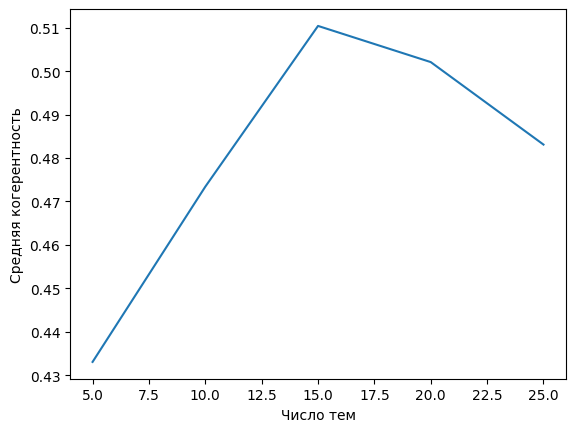

In [61]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [62]:
lda_10 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_10, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\Alexidis\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
